## HW4 Skeleton code

% import necessary modules

In [271]:
import numpy as np
import matplotlib.pyplot as plt

% Q1 setup

In [272]:
import scipy.stats as stats
import numpy.random as rn

In [273]:
rn.seed(0)

% Q1a

In [274]:
m = 10**5;  # number of coins
N = 16; # number of tosses each coin

#use np.random.uniform(see footnote1) to generate a 2d array of 10**5 x 16 random numbers between 0 and 1
sim = np.random.uniform(size = (m,N), low = 0, high = 1)

# convert values less than 0.5 to True - or “head”, and count the number of heads for each simulated coin.
headCounts = np.sum(sim < .5, axis = 1)

headCounts

array([5, 6, 7, ..., 9, 8, 8])

Generate headCounts and plot histogram in the cell below

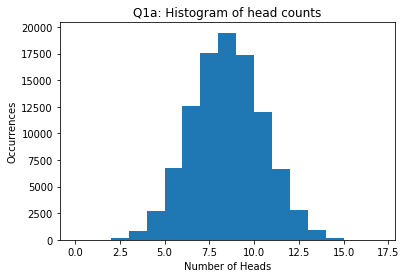

In [275]:
plt.figure()
plt.title('Q1a: Histogram of head counts')


[counts, bin_bounds, _] = plt.hist(headCounts, bins = range(18))

plt.xlabel('Number of Heads')
plt.ylabel('Occurrences')
plt.show()

% Q1b

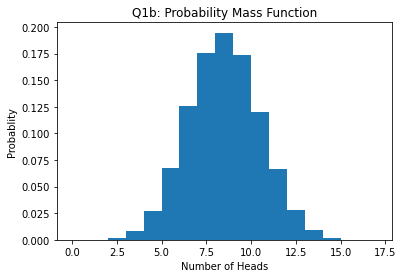

In [276]:
plt.figure()
plt.title('Q1b: Probability Mass Function')
PMF,_,_ = plt.hist(headCounts, bins = range(18), density = True)


plt.xlabel('Number of Heads')
plt.ylabel('Probablity')
plt.show()

% Q1c

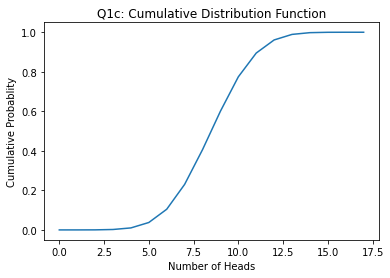

In [277]:
#Calculate the probability of having NO MORE THAN k heads out of 16 tosses, where k = 0, 1, 2, … 15, 16. Plot
#this as an empirical CDF (i.e. the probability is calculated from your experimental results). You can calculate
#the probabilities using values returned from 2a/2b by plt.hist, or the CDF code shown in lectures. Label your
#plots clearly.


plt.figure()
plt.title('Q1c: Cumulative Distribution Function')

CDF = list()     #This empty list will be populated with the data from the previous PMF histogram
#For k calculate the probablity of having No MORE THANK k heads out of 16 (range(17))
for k in range(18):
  CDF.append(sum(PMF[0:k]))

plt.plot(range(18), CDF)


plt.xlabel('Number of Heads')
plt.ylabel('Cumulative Probablity')
plt.show()

% Q1d

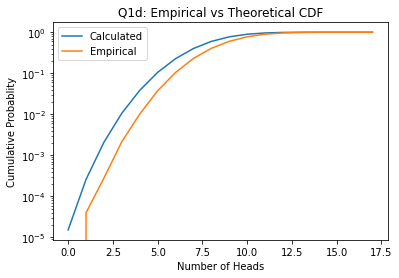

In [278]:
#Use the binomial distribution CDF (use scipy.stats.binom.cdf) to compute the theoretical probability (i.e.,
#from a formula without tossing thousands of coins – simulation or real) of having NO MORE THAN k heads
#out of 16 tosses, where k = 0, 1, 2, …, 15, 16, and compare these probabilities with the probabilities you
#obtained in 2c

from scipy.stats import binom

plt.figure()

CDF_Calculated = list()

for k in range(18):
  CDF_Calculated.append(binom.cdf(k, 16, 0.5))


plt.plot(range(18), CDF_Calculated)
plt.plot(range(18), CDF)





plt.yscale('log')
plt.xlabel('Number of Heads')
plt.ylabel('Cumulative Probablity')
plt.title('Q1d: Empirical vs Theoretical CDF')
plt.legend(['Calculated', 'Empirical'])
plt.show()

% Q1e

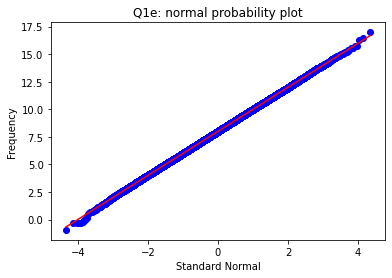

In [279]:
#(Bonus: 5 pts) Make a normal probability plot (thinkstats ch 4.4 and lecture slides / scripts) to show that the
#distribution of headCounts is close to a normal distribution with mean 8 and standard deviation 2. 
from scipy.stats import norm

plt.figure()



x = stats.norm.rvs(loc=8, scale=2, size=len(headCounts))
res = stats.probplot(x, plot=plt)

plt.title('Q1e: normal probability plot')
plt.xlabel("Standard Normal")
plt.ylabel("Frequency")
plt.show()

% Q1f

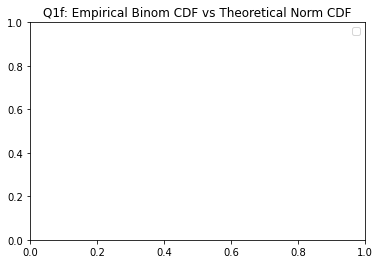

In [280]:
#Use normal distribution approximation to calculate the cumulative probabilities that you
#were asked to calculate in 2c, and compare the two results using a loglog plot. (The corresponding CDF from
#norm distribution can be calculated using scipy.stats.norm.cdf.)

plt.figure()






plt.legend(['Empirical', 'Theretical'])
plt.title('Q1f: Empirical Binom CDF vs Theoretical Norm CDF')
plt.show()

% Q2 (2e,2f optional)

2a, simulate fair coin and collect headCountsFair

In [281]:
#Similar as in Q1, but simulate the experiment of tossing 1000 fair coins, 10 times for each coin, and
#collect the number of heads observed for each coin. The result is 1000 integers between 0 and 10. Call
#this vector headCountsFair

m = 1000;  # number of coins
N = 10; # number of tosses each coin

sim = np.random.uniform(size = (m,N), low = 0, high = 1)

headCountsFair = np.sum(sim < .5, axis = 1)


2b, simulate loadd coin and collect headCountsLoaded

In [282]:
#Now simulate the experiment of tossing 1000 loaded coins where p_head = 0.6 (by converting each
#random number < 0.6 to head), 10 times each coin to collect the number of heads for each coin. The
#result is also 1000 integers between 0 and 10. Call this vector headCountsLoaded.

m = 1000;  # number of coins
N = 10; # number of tosses each coin

sim = np.random.uniform(size = (m,N), low = 0, high = 1)


headCountsLoaded = np.sum(sim < .6, axis = 1)


2c, plot both headCounts on the same figure

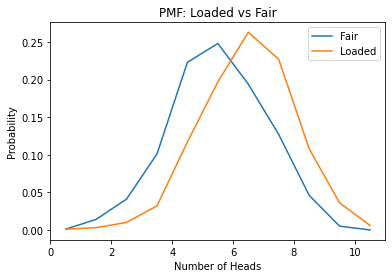

In [283]:
#Plot the PMF for headCountsFair and headCountsLoaded on the same histogram (using lines instead of
#bars). Label your figure clearly.


#PMF_fair,_,_= plt.hist(headCountsFair, bins = range(12), density = True)
#plt.close()

#PMF_loaded,_,_ = plt.hist(headCountsLoaded, bins = range(12), density = True)
#plt.close()

#plt.plot(PMF_fair)
#plt.plot(PMF_loaded)


countsFair = plt.hist(headCountsFair, bins = range(12))
plt.close()

countsLoaded = plt.hist(headCountsLoaded, bins = range(12))
plt.close()

bin_centerFair = (countsFair[1][1:]+countsFair[1][:-1])/2
bin_centerLoaded = (countsLoaded[1][1:]+countsLoaded[1][:-1])/2

plt.plot(bin_centerFair, countsFair[0]/sum(countsFair[0]), 
     bin_centerLoaded, countsLoaded[0]/sum(countsLoaded[0]))





plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.legend(('Fair', 'Loaded'))
plt.title("PMF: Loaded vs Fair")
plt.show()

2d, perform ttest and print out p-value; also print out a statement about whether or not there is statistically significant difference between the two sets of coins

In [284]:
#Perform a t-test between the two vectors and print out the t-statistic and the p-value. Does your t-test
#result support the argument that the two sets of coins are different from each other? 


print("These results support the argument that the two sets of coins are different from each other")
#print("These results suggest that there is no difference between the sets")
stats.ttest_ind(headCountsFair, headCountsLoaded)


These results support the argument that the two sets of coins are different from each other


Ttest_indResult(statistic=-14.36659160207916, pvalue=1.2935534432009474e-44)

% Q2e (Write a for loop to) repeat Q2a, Q2b and Q2d (with only 10 fair coins and 10 loaded coins) 10 times and count the number of times that you got a p-value <= 0.05

% Q2f (Write a for loop to) repeat Q2a, Q2b and Q2d 1000 times, but with two sets of coins that are all fair coins, and count number of times that you got a p-value <= 0.05

% Q3 setup

In [285]:
import pandas as pd

In [286]:
url = 'https://raw.githubusercontent.com/jianhuaruan/3753/main/'
# uncomment below to run locally
# url = ''
data = pd.read_csv(url + 'brfss2.csv', index_col=0)
data = data.drop('wtkg2',axis=1).dropna(axis=0, how='any').values
data.shape

(385974, 5)

data is now a numpy array and the columns are age, current weight (kg), <br>
last year's weight (kg), height (cm), and gender (1: male; 2: female).

% Q3a: Display summary statistics of three selected columns

In [287]:
#Display summary statistics:
#Print out the min, max, mean, median, mean+std, mean-std of current_weight,
#weight_a_year_ago, and height. Format your output in a tabular format (6 rows and 3 columns
#of data, with meaningful row and column labels.)

df = pd.DataFrame(data, columns = ['Age', 'Current_Weight(kg)', 'Weight_A_Year_Ago(kg)', 'Height(cm)', 'Gender'])

summaryStats = df.describe()[['Current_Weight(kg)',	'Weight_A_Year_Ago(kg)', 'Height(cm)']].iloc[1:,:]
summaryStats.loc['median'] = summaryStats.loc['50%']
summaryStats.loc['mean + std'] = summaryStats.loc['mean'] + summaryStats.loc['std']
summaryStats.loc['mean - std'] = summaryStats.loc['mean'] - summaryStats.loc['std']
summaryStats = summaryStats.drop(['std','50%', '25%', '75%'])
summaryStats.reindex(['min', 'max', 'mean', 'median', 'mean + std', 'mean - std'])
print(summaryStats)

            Current_Weight(kg)  Weight_A_Year_Ago(kg)  Height(cm)
mean                 79.061463              79.805186  169.013441
min                  20.000000              22.727273   61.000000
max                 300.000000             342.272727  236.000000
median               77.272727              77.272727  168.000000
mean + std           98.575746             100.384058  179.402311
mean - std           59.547181              59.226315  158.624571


% Q3b: scatter plots and Pearson correlation coefficients

Pearson correlation between Weight Change and Current Weight: 
0.034132175224082885

Pearson correlation between Weight Change and Weight A Year Ago(kg): 
-0.31911696303346515
The Peason correlation between Weight Change and Weight A Year Ago is most correlated and the scatter plot graph supports this

Pearson correlation between Weight Change and Age: 
-0.06867582903526569



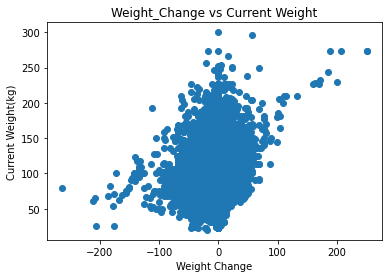

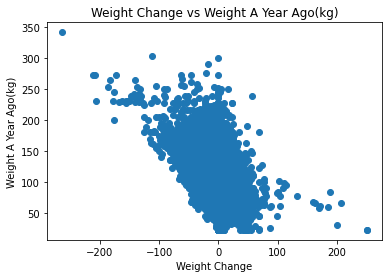

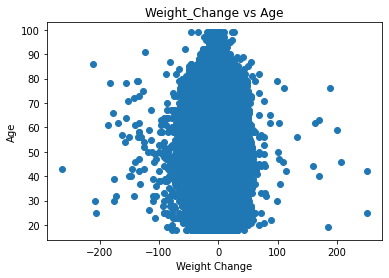

In [288]:
#Define weight_change = (current_weight – weight_a_year_ago). Calculate Pearson correlation between
#weight_change and the following variables, and determine which one is most correlated (regardless of
#sign of correlation) with weight_change. Make scatter plots to support your conclusion.


df_corr = df[['Current_Weight(kg)', 'Weight_A_Year_Ago(kg)', 'Age']].copy()

#define weight_change
df_corr['Weight_Change'] = df_corr['Current_Weight(kg)'] - df_corr['Weight_A_Year_Ago(kg)']


#i. current_weight
print("Pearson correlation between Weight Change and Current Weight: ")
print(np.corrcoef(df_corr['Weight_Change'], df_corr['Current_Weight(kg)'])[1][0])
print()
plt.figure()
plt.title("Weight_Change vs Current Weight" )
plt.xlabel("Weight Change")
plt.ylabel("Current Weight(kg)")
plt.scatter(df_corr['Weight_Change'], df_corr['Current_Weight(kg)'])


#ii. weight_a_year_ago
print("Pearson correlation between Weight Change and Weight A Year Ago(kg): ")
print(np.corrcoef(df_corr['Weight_Change'], df_corr['Weight_A_Year_Ago(kg)'])[1][0])
print("The Peason correlation between Weight Change and Weight A Year Ago is most correlated and the scatter plot graph supports this")
print()
plt.figure()
plt.title("Weight Change vs Weight A Year Ago(kg)" )
plt.xlabel("Weight Change")
plt.ylabel("Weight A Year Ago(kg)")
plt.scatter(df_corr['Weight_Change'], df_corr['Weight_A_Year_Ago(kg)'])

#iii. age
print("Pearson correlation between Weight Change and Age: ")
print(np.corrcoef(df_corr['Weight_Change'], df_corr['Age'])[1][0])
print()
plt.figure()
plt.title("Weight_Change vs Age" )
plt.xlabel("Weight Change")
plt.ylabel("Age")
plt.scatter(df_corr['Weight_Change'], df_corr['Age'])





% Q3c: compare weight_change for men and women: mean, SEM, t-test

In [289]:
#Calculate the mean and SEM (standard error of the mean) for the weight_change of male and female,
#respectively. Use t-test to test whether there is a significant difference between the weight_change of
#male and female.


#Get male data
male_df = df[df['Gender'] == 1].copy()
male_df['Weight_Change'] = male_df['Current_Weight(kg)'] - male_df['Weight_A_Year_Ago(kg)']


#Get female data
female_df = df[df['Gender'] == 2].copy()
female_df['Weight_Change'] = female_df['Current_Weight(kg)'] - female_df['Weight_A_Year_Ago(kg)']


#Calculate Mean and SEM for each gender
#Standard Error of the Mean (SEM): standard deviation / sqrt(n)

#Male
print("Mean weight change for Males")
print(male_df['Weight_Change'].mean())
print("Male SEM")
male_SEM = male_df['Weight_Change'].std()/ male_df['Weight_Change'].shape[0]
print(male_SEM)

print()

#Female
print("Mean weight change for Females")
print(female_df['Weight_Change'].mean())
print("Female SEM")
female_SEM = female_df['Weight_Change'].std()/ female_df['Weight_Change'].shape[0]
print(female_SEM)

#T-test
print()

print("The p-value shows that there is a significant difference between the weight_change of male and female.")
stats.ttest_ind(male_df['Weight_Change'], female_df['Weight_Change'])

Mean weight change for Males
-0.8559857662179234
Male SEM
4.586123606680526e-05

Mean weight change for Females
-0.6721114983008951
Female SEM
3.1574290653835574e-05

The p-value shows that there is a significant difference between the weight_change of male and female.


Ttest_indResult(statistic=-7.701843115268436, pvalue=1.3443372547049559e-14)

% Q3d: compare weight/height ratio for men and women: mean, SEM, t-test

In [292]:
#Define weight_height _ratio as current_weight/height. Calculate the mean and SEM (standard error of
#the mean) for the weight_height_ratio of male and female. Use t-test to test whether there is a
#significant difference between the weight_height_ratio of male and female. 


#Get male data
male_df = df[df['Gender'] == 1].copy()
male_df['Weight_Height_Ratio'] = male_df['Current_Weight(kg)'] / male_df['Height(cm)']

print("Male Weight Height Ratio Mean:")
print(male_df['Weight_Height_Ratio'].mean())

print("Male Weight Height Ratio SEM: ")
male_SEM = male_df['Weight_Height_Ratio'].std()/ male_df['Weight_Height_Ratio'].shape[0]
print(male_SEM)


print()

#Get female data
female_df = df[df['Gender'] == 2].copy()
female_df['Weight_Height_Ratio'] = female_df['Current_Weight(kg)'] / female_df['Height(cm)']

print("Female Weight Height Ratio Mean:")
print(female_df['Weight_Height_Ratio'].mean())

print("Female Weight Height Ratio SEM: ")
female_SEM = female_df['Weight_Height_Ratio'].std()/ female_df['Weight_Height_Ratio'].shape[0]
print(female_SEM)

print()

#T-Test
print("The p-value shows that there is a significant difference between the weight height ratio of male and female.")
stats.ttest_ind(male_df['Weight_Height_Ratio'], female_df['Weight_Height_Ratio'])

Male Weight Height Ratio Mean:
0.49917437564030115
Male Weight Height Ratio SEM: 
6.302083297573433e-07

Female Weight Height Ratio Mean:
0.44479035605452055
Female Weight Height Ratio SEM: 
4.3824168676639484e-07

The p-value shows that there is a significant difference between the weight height ratio of male and female.


Ttest_indResult(statistic=164.6991226748384, pvalue=0.0)

% Q3e (bonus)

In [291]:
#(bonus: 10pts) Randomly split the subjects into two groups of roughly equal sizes, and use t-test to test
#whether there is a significant difference between the weight_change of the two groups. Repeat the
#process 1000 times and plot the distribution of the -log10(p-value) of the t-test results. What can you
#say about the difference between male and female in terms of their weight_change? (Consider both the
#p-value and the absolute differences between the two means.)
